In [1]:
import pandas as pd

root = '../dataset/hi'

# Load dataset
hiv = pd.read_csv(f'{root}/hiv-charge-CS2_36.csv')
hii = pd.read_csv(f'{root}/hii-charge-CS2_36.csv')

In [70]:
# Unisci i due dataset utilizzando la colonna "cycle"
df = pd.merge(hiv, hii, on="cycle")

# Rimuovi la colonna "cycle" dal DataFrame risultante
df = df.drop(columns=["cycle"], inplace=False)


# Visualizza il DataFrame risultante
print(df)

         hi_v      hi_i
0    7.091993  0.112652
1    6.639214  0.109022
2    6.599330  0.104322
3    6.627282  0.104634
4    6.389022  0.105921
..        ...       ...
955  0.371274  0.102178
956  0.345076  0.100375
957  0.392511  0.099698
958  0.404034  0.101053
959  0.399089  0.100489

[960 rows x 2 columns]


In [73]:
from sklearn.preprocessing import StandardScaler

# Istanzia lo StandardScaler
scaler = StandardScaler()

# Standardizza i dati
scaled_data = scaler.fit_transform(df)

# Crea un nuovo DataFrame con i dati standardizzati
df = pd.DataFrame(scaled_data, columns=df.columns)


c:\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.appl

In [74]:
df

,hi_v,hi_i
0,1.443621,-0.330601
1,1.183608,-0.494405
2,1.160705,-0.706452
3,1.176756,-0.692373
4,1.039933,-0.634293
...,...,...
955,-2.415815,-0.803148
956,-2.430860,-0.884523
957,-2.403620,-0.915055
958,-2.397003,-0.853926


In [75]:
# Split into train and test sets
df = df.values

train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [76]:
df

array([[ 1.44362064, -0.33060122],
       [ 1.18360839, -0.49440452],
       [ 1.1607045 , -0.70645153],
       ...,
       [-2.40361977, -0.91505542],
       [-2.39700274, -0.85392589],
       [-2.3998427 , -0.87935446]])

In [67]:
import numpy as np
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
 X, y = [],[]
 for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
 return np.array(X), np.array(y)

In [84]:
seq_length = 10

# Create sequences for training set
X_train, y_train = split_sequence(train_data, seq_length)

# Create sequences for testing set
X_test, y_test = split_sequence(test_data, seq_length)

print(X_train.shape[0], X_train.shape[1])
print(y_train.shape[0], y_train.shape[1])


758 10
758 2


In [100]:
print(X_test.shape[0], X_test.shape[1])


182 10


In [93]:
n_steps = 10
n_features = 2

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape, n_steps)

(758, 10, 2) 10


In [94]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# define model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [102]:
# fit model
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 22ms/step - loss: 0.5427
Epoch 2/200
24/24 [==============================] - 0s 14ms/step - loss: 0.5416
Epoch 3/200
24/24 [==============================] - 0s 16ms/step - loss: 0.5522
Epoch 4/200
24/24 [==============================] - 0s 17ms/step - loss: 0.5503
Epoch 5/200
24/24 [==============================] - 0s 17ms/step - loss: 0.5297
Epoch 6/200
24/24 [==============================] - 0s 14ms/step - loss: 0.5267
Epoch 7/200
24/24 [==============================] - 0s 14ms/step - loss: 0.5414
Epoch 8/200
24/24 [==============================] - 0s 15ms/step - loss: 0.5369
Epoch 9/200
24/24 [==============================] - 0s 16ms/step - loss: 0.5249
Epoch 10/200
24/24 [==============================] - 0s 16ms/step - loss: 0.5344
Epoch 11/200
24/24 [==============================] - 0s 17ms/step - loss: 0.5374
Epoch 12/200
24/24 [==============================] - 0s 16ms/step - loss: 0.5297
Epoch 13/200
24/24 [=====

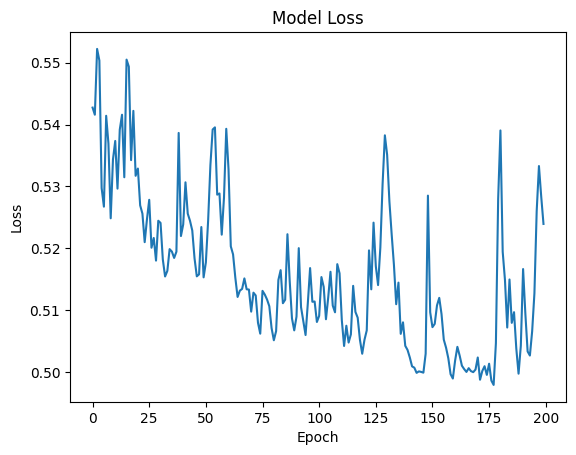

In [103]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [104]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.52 MSE (0.72 RMSE)
Test Score: 2.75 MSE (1.66 RMSE)
